In [1]:
from recsys_slates_dataset import dataset_torch
ind2val, itemattr, dataloaders = dataset_torch.load_dataloaders(data_dir="data")

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-07 14:26:48,737 Download data if not in data folder..
2023-03-07 14:26:48,738 Downloading data.npz

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1XHqyk01qi9qnvBTfWWwqgDzrdjv1eBVV 

2023-03-07 14:26:48,935 Downloading ind2val.json


Access denied with the following error:


Downloading...
From: https://drive.google.com/uc?id=1WOCKfuttMacCb84yQYcRjxjEtgPp6F4N
To: /home/aayush/git/rl_recsys/src/rl_recsys/trial/data/ind2val.json
100%|██████████| 10.8k/10.8k [00:00<00:00, 10.6MB/s]
2023-03-07 14:26:49,607 Downloading itemattr.npz
Downloading...
From: https://drive.google.com/uc?id=1rKKyMQZqWp8vQ-Pl1SeHrQxzc5dXldnR
To: /home/aayush/git/rl_recsys/src/rl_recsys/trial/data/itemattr.npz
100%|██████████| 16.4k/16.4k [00:00<00:00, 27.0MB/s]
2023-03-07 14:26:50,913 Done downloading all files.
2023-03-07 14:26:50,913 Load data..
2023-03-07 14:27:35,416 Loading dataset with slate size=torch.Size([2277645, 20, 25]) and number of negative samples=False
2023-03-07 14:27:35,425 Loading dataset with slate size=torch.Size([113882, 20, 25]) and number of negative samples=False
2023-03-07 14:27:35,434 Loading dataset with slate size=torch.Size([113882, 20, 25]) and number of negative samples=False
2023-03-07 14:27:35,436 In train: num_users: 2277645, num_batches: 2225
2023-03-

In [5]:
df=next(iter(dataloaders))

In [14]:
dataloaders.__getitem__(10)

KeyError: 10

In [12]:
dataloaders.values()

dict_values([<torch.utils.data.dataloader.DataLoader object at 0x7fa64304ed30>, <torch.utils.data.dataloader.DataLoader object at 0x7fa64312e0d0>, <torch.utils.data.dataloader.DataLoader object at 0x7fa64312e100>])

In [10]:
for i in df.values():
    print(i)

AttributeError: 'str' object has no attribute 'values'

In [9]:
for step,x in enumerate(dataloaders):
    print(x)

train
valid
test


In [1]:
import random as rand
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
nusers = 100
nitems = 100
k = 10

pu = np.random.rand(k,1)

Q = np.random.rand(nitems,k)
nQ = np.dot(Q,Q.T)

ru = np.dot(Q,pu)
D = (np.diag(nQ) + np.diag(nQ.T) - 2*nQ)
nitems = len(ru)
ntrans=200
state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
action = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)


In [3]:
act = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)

In [4]:
len(ru)

100

In [5]:
def getReward1(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0]
        for i in range(0, len(state)):
            if state[i]==-1:
                reward +=0
                break
            else:
                reward += (1/((len(state)-i)+1)) * dist[(state[i])*nitems + action] 
    except IndexError:
        reward = 0
    return reward

In [6]:
from gym import Env
from gym.spaces import Discrete, Box
from numpy import int64

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from gym.spaces import Box, Discrete
from tqdm import tqdm

  
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

2023-01-27 11:55:22.800721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 11:55:23.012972: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-27 11:55:23.013010: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 11:55:24.009901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

In [7]:
a=Box(low=0, high=99, shape=(1,2), dtype=int64)
k=a.sample()
print(k.shape)


(1, 2)


Setup a custom environment and as in a episode the size is of 10 items therefore the input to the dqn model should be a state with size (1,10). So at the very start the stae is initialized as [item, -1, -1, -1, -1, -1, -1, -1, -1, -1]. So at every step an action is taken i.e. an item the state space replaces -1 with that action in the position of the step which is controlled by i.

In [8]:
class CustomEnv1(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,10), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        
    def step(self,action):
        self.i+=1
        for j in range(self.i,10):
            self.state[j]=-1
        
        if action in self.state:
            self.state[self.i]=action
            reward = -10
        else:  
            self.state[self.i]=action  
            reward= getReward1(ru, D, self.state, action)
        
        if self.i==9:
            print(self.state)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [9]:
env = CustomEnv1()

In [10]:
episodes = 10 #20 shower episodes
for episode in tqdm(range(1, episodes+1)):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 10/10 [00:00<00:00, 975.81it/s]

[85 52 88 79 30 89 32 47 27 45]
Episode:1 Score:23.761477681055375
[74 90 51 64 17 59 76 51 21 44]
Episode:2 Score:17.783897562983416
[20 74 79 55 84 36  0 86 84 97]
Episode:3 Score:14.195044231023303
[80 54 33  6 67 74 69 79 81 37]
Episode:4 Score:28.20519663691782
[48 38 67 49 32 62 80 23 64 78]
Episode:5 Score:28.07094782933553
[ 7 28 63 11 63  3 61 12 66 34]
Episode:6 Score:15.898504843169409
[ 0 16 35 73 13 11  0 62 53 73]
Episode:7 Score:-4.800714774443621
[85 71 75 56 58 20 11 44 39 77]
Episode:8 Score:26.064876876336136
[29 31 15 70 13 23 69 20 31 31]
Episode:9 Score:-4.2496961905460715
[17 30 70  5 96 83 41 16 70 96]
Episode:10 Score:-0.839911117492754


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.optimizers import Adam

In [12]:
states = np.shape(env.observation_space)
actions = env.action_space.n

In [13]:
states

(1, 10)

In [14]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [15]:
model = build_model(states, actions)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             264       
                                                                 
 dense_1 (Dense)             (None, 1, 24)             600       
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               2500      
                                                                 
Total params: 3,364
Trainable params: 3,364
Non-trainable params: 0
_________________________________________________________________


In [17]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=0.1)
    return dqn

In [18]:

#Adam._name = 'hey'

In [19]:

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
history=dqn.fit(env, nb_steps=40000, visualize=False, verbose=1)

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-01-27 11:55:27.938304: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-27 11:55:27.938434: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-27 11:55:27.938533: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could n

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training for 40000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 14:27 - reward: 1.6581[15 76 66 66 66 66  3 66 66 66]


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-27 11:55:28.559911: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_2/BiasAdd' id:115 op device:{requested: '', assigned: ''} def:{{{node dense_2/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2/MatMul, dense_2/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-27 11:55:28.583487: W tensorflow/c/c_api.cc:291] Operation '{name:'count_1/Assign' id:373 op device:{requested: '', assigned: ''} def:{{{node count_1/Assign}} = AssignVariableOp[_has_manual_co

   37/10000 [..............................] - ETA: 3:52 - reward: -2.6806

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memo

[ 9 29  1 62 86 74 74 78 46 46]
10000/10000 [==============================] - 66s 7ms/step - reward: 1.8317
1111 episodes - episode_reward: 16.485 [-50.915, 35.504] - loss: 7.474 - mae: 3.891 - mean_q: 4.947

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 67s 7ms/step - reward: 2.2960
1111 episodes - episode_reward: 20.663 [-27.755, 35.674] - loss: 6.535 - mae: 2.867 - mean_q: 4.706

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 67s 7ms/step - reward: 2.3757
1111 episodes - episode_reward: 21.382 [-16.620, 36.149] - loss: 6.169 - mae: 2.535 - mean_q: 4.620

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 68s 7ms/step - reward: 2.3880
done, took 268.945 seconds


In [27]:
a=env.observation_space.sample().ravel()
print(a)
a=[[ 9, 24, -1, -1, -1, -1, -1, -1, -1, -1]]

print(len(dqn.compute_q_values(a)))
dqn.compute_q_values(a)

[42 39 51 90 14 74 60 56 50 35]
100


array([ 2.7754521 ,  1.7029871 , -4.917545  ,  3.1169596 ,  1.5901628 ,
        1.540683  ,  1.9169503 ,  2.174103  , -0.11377721,  1.709537  ,
        1.8599796 ,  2.7371953 ,  2.3790526 ,  0.94511026,  1.9274653 ,
        2.4504397 ,  1.3979532 ,  1.5904771 ,  1.187532  ,  2.3337536 ,
        2.1717966 ,  2.3455098 ,  2.326733  , -1.9208512 ,  1.467737  ,
        2.2407775 ,  2.0509598 ,  1.8893433 ,  3.1265147 ,  2.9317105 ,
        2.0333889 ,  2.0765896 ,  2.2265978 ,  2.256836  ,  1.7977952 ,
        1.8939759 ,  3.06382   ,  1.6717483 ,  1.5414827 ,  2.335892  ,
        2.1586843 ,  2.9363315 , -0.7372149 ,  2.2127576 ,  3.6707609 ,
        2.3503528 , -1.9130404 ,  2.3234086 ,  0.11281484,  1.9507635 ,
        1.9664252 ,  2.3296623 ,  1.3402112 ,  1.578141  ,  1.3421247 ,
        3.2524738 ,  1.3638961 ,  2.9953804 ,  3.331301  ,  2.6112301 ,
        2.9404395 ,  3.4369938 ,  1.3186208 ,  1.6328311 ,  2.3805985 ,
        2.665014  ,  2.9412048 ,  1.9040017 ,  3.3237233 ,  1.57

In this we start with a random state and keep on adding action which generates the highest reward out of all the 100 actions.

In [31]:
state=[73]
a=[]
nitems = len(ru)
dist = D.flatten()
for k in range(0,9):
    for j in range(0, 100):
        a.append(ru[j][0])
        for i in range(0, len(state)):
            if j in state:
                a[j]+=-10
            else:
                a[j]+= (1/((len(state)-i)+1)) * dist[(state[i])*nitems + j]
    max_v=max(a)
    index = a.index(max_v)
    state.append(index)
print(max_v)
print(state)






26.387283820832764
[73, 68, 36, 61, 57, 31, 58, 28, 26, 3]


In [29]:

results = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(results.history['episode_reward'])) 


Testing for 10 episodes ...
[33 71 71 93 28 19 47 57 29 89]
Episode 1: reward: 17.581, steps: 9
[15 44 66 93 93 93 36 45 93 68]
Episode 2: reward: -9.008, steps: 9
[94 44 28 93 58 83 22 83 29 77]
Episode 3: reward: 17.928, steps: 9
[63 44 44 93 64 79 22 83 28 93]
Episode 4: reward: 4.037, steps: 9
[37 44 44 93 57 26 83 57 22 88]
Episode 5: reward: 4.691, steps: 9
[66 71 66 41 64  3 19 83 88 28]
Episode 6: reward: 19.774, steps: 9
[37 58 66 93 28 19 47 57 65 66]
Episode 7: reward: 15.371, steps: 9
[41 71 71 93 28 19 47 57 29 89]
Episode 8: reward: 17.394, steps: 9
[73 93 66 41 95  3 58 83 88 28]
Episode 9: reward: 35.908, steps: 9
[28  3 93 22 22 66 65 25 25 89]
Episode 10: reward: 1.520, steps: 9
12.51971771550235


In [32]:
import rl.callbacks
class EpisodeLogger(rl.callbacks.Callback):
    def __init__(self):
        self.observations = {}
        self.rewards = {}
        self.actions = {}

    def on_episode_begin(self, episode, logs):
        self.observations[episode] = []
        self.rewards[episode] = []
        self.actions[episode] = []
        
    def on_step_end(self, step, logs):
        episode = logs['episode']
        self.observations[episode].append(logs['observation'])
        print(logs['observation'])
        print(logs['reward'])
        print(logs['action'])
        self.rewards[episode].append(logs['reward'])
        self.actions[episode].append(logs['action'])

cb_ep = EpisodeLogger()
dqn.test(env, nb_episodes=10, visualize=False, callbacks=[cb_ep])






Testing for 10 episodes ...
[ 6 89 -1 -1 -1 -1 -1 -1 -1 -1]
2.4877099052545355
89
[ 6 89 71 -1 -1 -1 -1 -1 -1 -1]
2.8873714276892195
71
[ 6 89 71 44 -1 -1 -1 -1 -1 -1]
3.5133035845359655
44
[ 6 89 71 44 22 -1 -1 -1 -1 -1]
3.005334892116256
22
[ 6 89 71 44 22 95 -1 -1 -1 -1]
2.9739799347331837
95
[ 6 89 71 44 22 95 83 -1 -1 -1]
3.3876837223898844
83
[ 6 89 71 44 22 95 83 81 -1 -1]
3.535564143279546
81
[ 6 89 71 44 22 95 83 81 89 -1]
-10.0
89
[ 6 89 71 44 22 95 83 81 89  3]
[ 6 89 71 44 22 95 83 81 89  3]
6.333122626690545
3
Episode 1: reward: 18.124, steps: 9
[25 36 -1 -1 -1 -1 -1 -1 -1 -1]
2.930130718096211
36
[25 36 44 -1 -1 -1 -1 -1 -1 -1]
2.991579009151166
44
[25 36 44 93 -1 -1 -1 -1 -1 -1]
3.1996587621746766
93
[25 36 44 93 44 -1 -1 -1 -1 -1]
-10.0
44
[25 36 44 93 44 91 -1 -1 -1 -1]
1.5383334691968693
91
[25 36 44 93 44 91 22 -1 -1 -1]
3.371467213738497
22
[25 36 44 93 44 91 22 22 -1 -1]
-10.0
22
[25 36 44 93 44 91 22 22  0 -1]
3.1254992450909302
0
[25 36 44 93 44 91 22 22  0  0]
[

In [33]:
rewards=[]
for obs in cb_ep.rewards.values():
    rewards.append(obs)

In [34]:
cum_reward=[]
for i in rewards:
    p=0
    u=[]
    for j in i:
        j*=-1
        p+=j
        u.append(p)
    cum_reward.append(u)

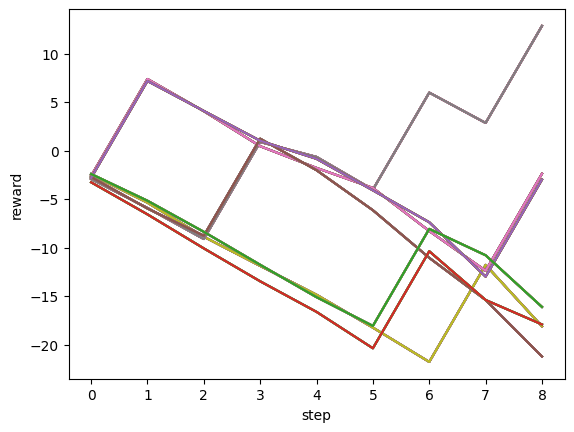

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
x=list(range(9))
for i in range(7):
    purchases = cum_reward[i]
    for j in range(len(purchases)):
        plt.plot(x,purchases)
        plt.xlabel("step")
        plt.ylabel("reward")